In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import os

In [3]:
path2target = '/Users/y1u0d2/desktop/Lab/result/sf/Si/'
filename = 'sf_force.pickle'

df = pd.read_pickle(os.path.join(path2target, filename))

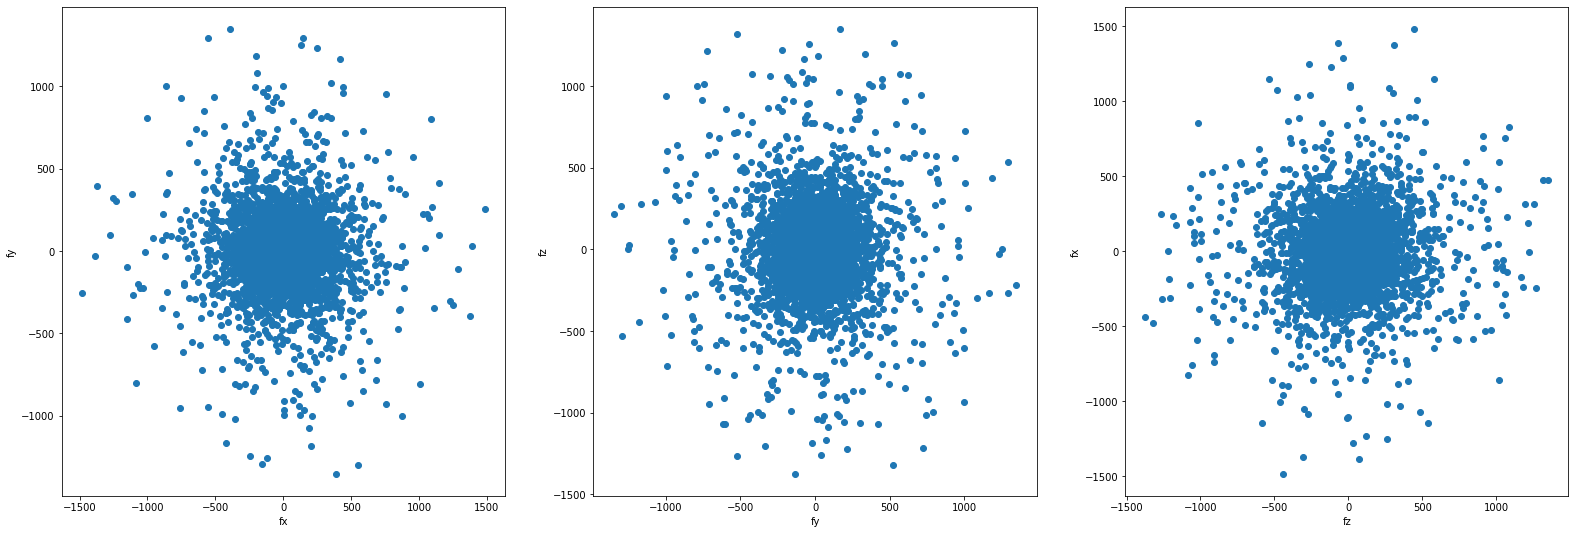

In [4]:
fig = plt.figure(figsize=(27,9))
axes = fig.subplots(1,3)

axes[0].set_xlabel('fx')
axes[0].set_ylabel('fy')
axes[0].scatter(df['fx'], df['fy'])

axes[1].set_xlabel('fy')
axes[1].set_ylabel('fz')
axes[1].scatter(df['fy'], df['fz'])

axes[2].set_xlabel('fz')
axes[2].set_ylabel('fx')
axes[2].scatter(df['fz'], df['fx'])

In [5]:
exp_columns = list(filter(lambda x: 'eta' in x, df.columns))
df_a = df[exp_columns]

<AxesSubplot:>

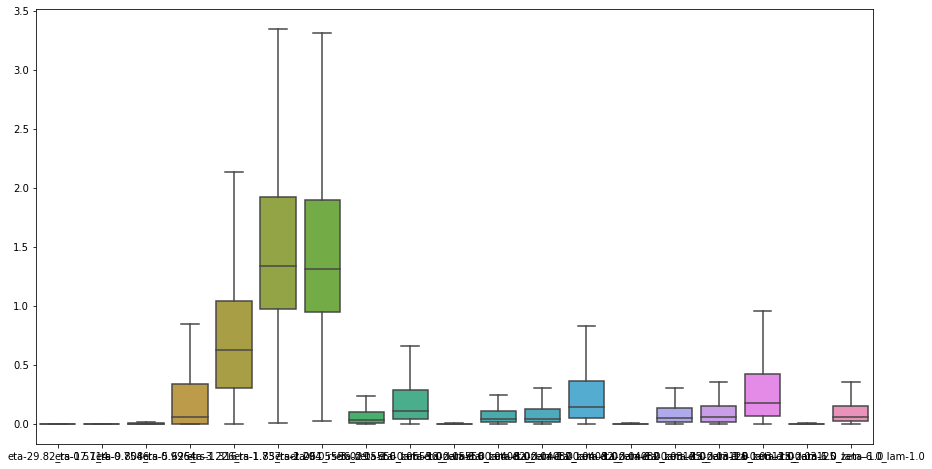

In [6]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

sns.boxplot(data=df_a, showfliers=False, ax=ax)
# sns.stripplot(data=df, jitter=True, ax=ax)

In [7]:
# 標準化
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(data=scaler.fit_transform(df_a), columns=exp_columns)

<AxesSubplot:>

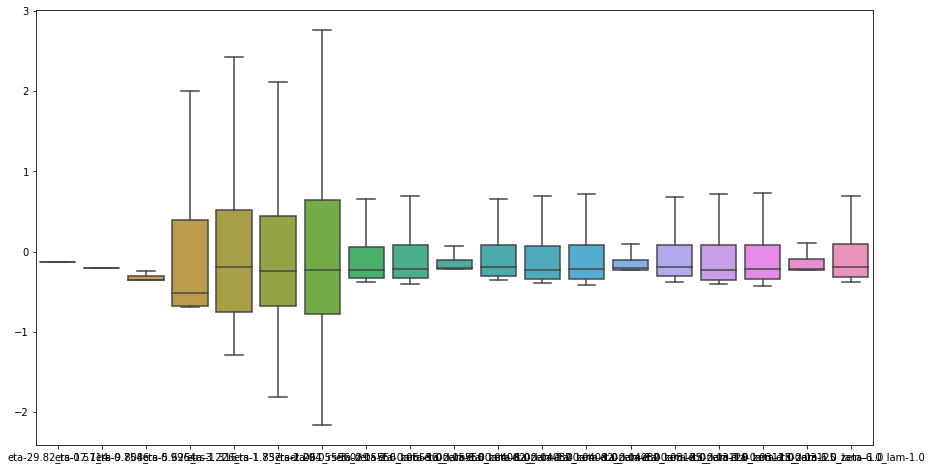

In [8]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)

sns.boxplot(data=df_scaled, showfliers=False, ax=ax)

<AxesSubplot:>

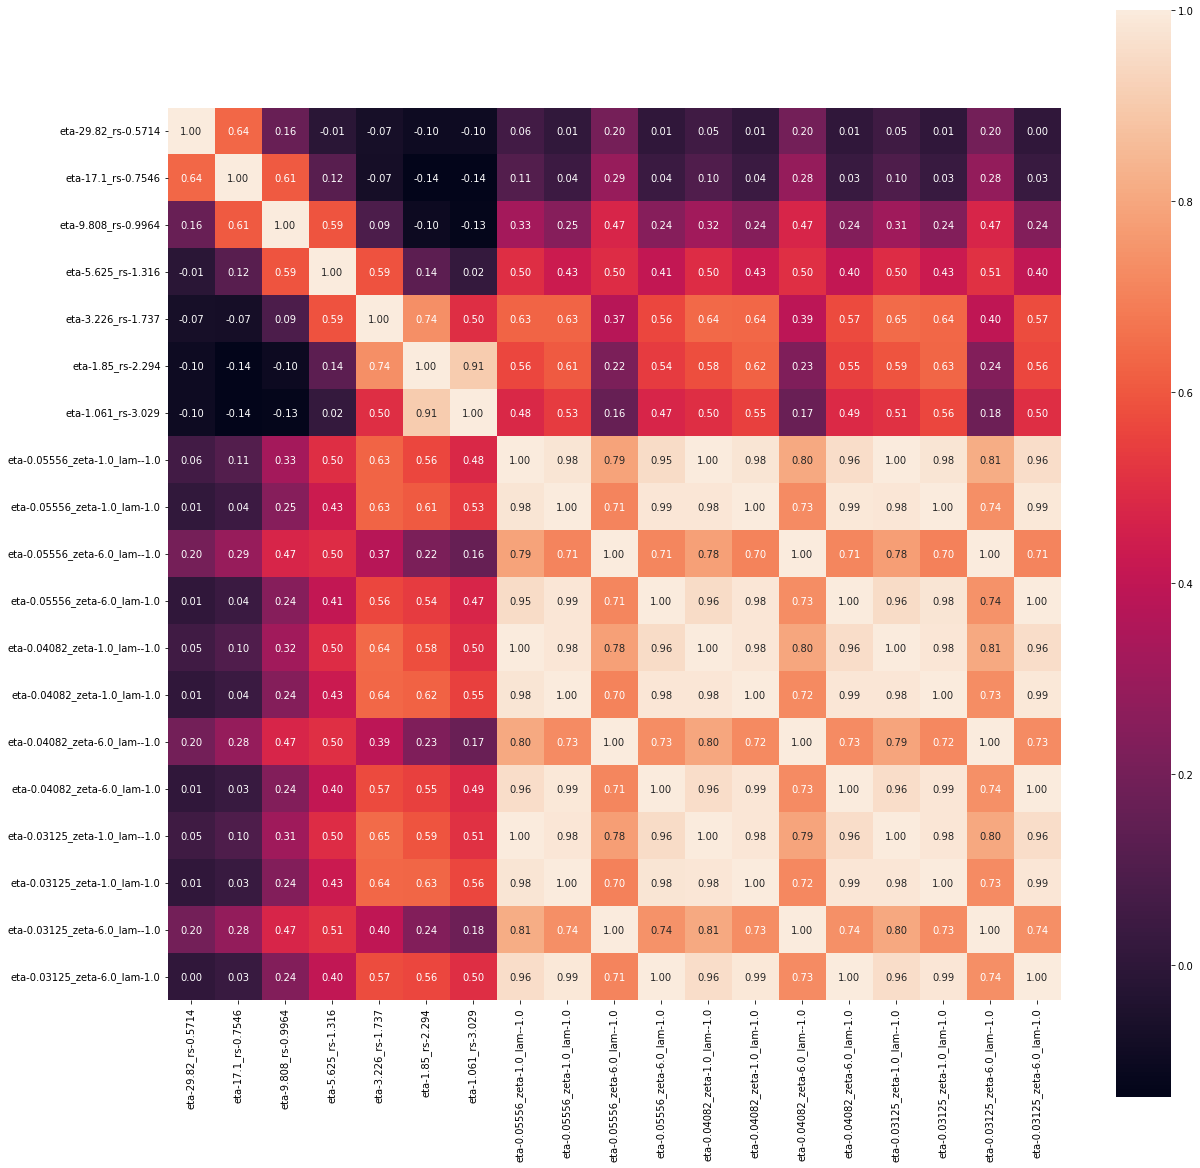

In [9]:
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)

corr = df_scaled.corr()
sns.heatmap(corr, square=True, annot=True, fmt='.2f', ax=ax)
# sns.clustermap(corr)

In [10]:
corr = df_scaled.corr()
# sns.heatmap(corr, square=True, annot=True, fmt='.2f', ax=ax)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# x成分回帰

In [12]:
X_train,X_test,y_train,y_test = train_test_split(df_scaled, df['fx'], test_size=0.25)

In [13]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)

0.00021236293142190554

In [14]:
from sklearn.linear_model import RidgeCV

clf = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1], cv=5).fit(X_train, y_train)
clf.score(X_test, y_test)

6.857021731665469e-05

In [15]:
# from sklearn.ensemble import GradientBoostingRegressor

# reg = GradientBoostingRegressor(random_state=42)
# reg.fit(X_train, y_train)
# reg.score(X_test, y_test)

In [16]:
import lightgbm as lgb

trains = lgb.Dataset(X_train, y_train)
tests = lgb.Dataset(X_test, y_test)

params = {
    "objective": "regression",
    "metrics": "rmse"
}

model = lgb.train(params, trains, valid_sets=tests, num_boost_round=1000, early_stopping_rounds=100)

/Users/y1u0d2/opt/anaconda3/envs/ml/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 92220, number of used features: 19
[LightGBM] [Info] Start training from score -0.026002
[1]	valid_0's rmse: 44.953
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 44.925
[3]	valid_0's rmse: 44.9068
[4]	valid_0's rmse: 44.9102
[5]	valid_0's rmse: 44.8772
[6]	valid_0's rmse: 44.9034
[7]	valid_0's rmse: 44.8753
[8]	valid_0's rmse: 44.8885
[9]	valid_0's rmse: 44.9314
[10]	valid_0's rmse: 44.9431
[11]	valid_0's rmse: 44.9861
[12]	valid_0's rmse: 44.9911
[13]	valid_0's rmse: 44.9811
[14]	valid_0's rmse: 44.958
[15]	valid_0's rmse: 44.9865
[16]	valid_0's rmse: 45.0303
[17]	valid_0's rmse: 45.0703
[18]	valid_0's rmse: 44.9837
[19]	valid_0's rmse: 45.102
[20]	valid_0's rmse: 45.1528
[21]	valid_0's rmse: 45.1

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

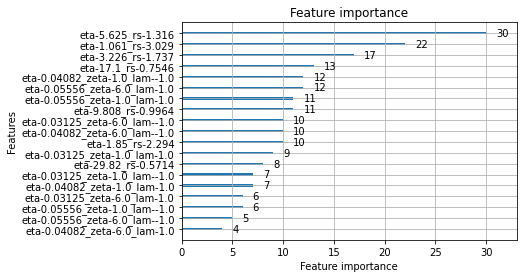

In [17]:
lgb.plot_importance(model)

In [18]:
df_scaled.columns

Index(['eta-29.82_rs-0.5714', 'eta-17.1_rs-0.7546', 'eta-9.808_rs-0.9964',
       'eta-5.625_rs-1.316', 'eta-3.226_rs-1.737', 'eta-1.85_rs-2.294',
       'eta-1.061_rs-3.029', 'eta-0.05556_zeta-1.0_lam--1.0',
       'eta-0.05556_zeta-1.0_lam-1.0', 'eta-0.05556_zeta-6.0_lam--1.0',
       'eta-0.05556_zeta-6.0_lam-1.0', 'eta-0.04082_zeta-1.0_lam--1.0',
       'eta-0.04082_zeta-1.0_lam-1.0', 'eta-0.04082_zeta-6.0_lam--1.0',
       'eta-0.04082_zeta-6.0_lam-1.0', 'eta-0.03125_zeta-1.0_lam--1.0',
       'eta-0.03125_zeta-1.0_lam-1.0', 'eta-0.03125_zeta-6.0_lam--1.0',
       'eta-0.03125_zeta-6.0_lam-1.0'],
      dtype='object')

In [19]:
# sns.pairplot(df_scaled)

<AxesSubplot:xlabel='fx', ylabel='fz'>

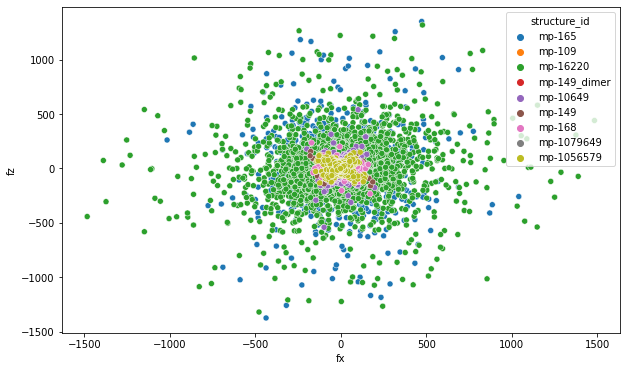

In [20]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

sns.scatterplot(x='fx', y='fz', hue='structure_id', data=df)

<AxesSubplot:xlabel='fy', ylabel='fz'>

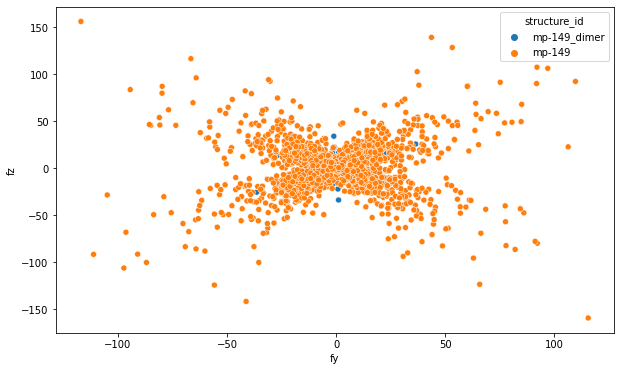

In [21]:
mp_ids = ['mp-149', 'mp-149_dimer']
df_tmp = df.loc[df['structure_id'].isin(mp_ids)]
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

sns.scatterplot(x='fy', y='fz', hue='structure_id', data=df_tmp)